#One random Solution



In [132]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import time
import math

In [133]:
class Jssp:
  def __init__(self, filename):
    self.filename = filename
    
    with open(self.filename) as f:
      self.n, self.m = [int(x) for x in f.readline().split()]
      self.jobs = np.zeros((self.n,self.m, 2), dtype=int)
      i = 0
      for line in f:
        self.jobs[i] = np.array([int(x) for x in line.split()]).reshape(self.m,2)
        i +=1
    self.mstart = np.zeros((self.m), dtype=int)
    self.jend = np.zeros((self.m), dtype=int)
    self.idxs = np.zeros((self.n), dtype=int)
    self.makespan = 0

    self.rep = [i for i in range(self.n)]*self.m
    random.shuffle(self.rep)

  def solve(self):
    for e in self.rep:
      i = self.idxs[e]
      self.idxs[e] += 1
      self.midx = self.jobs[e, i, 0]
      self.time = self.jobs[e, i, 1]
      self.mstart[self.midx] = max(self.mstart[self.midx], self.jend[i]) + self.time
      self.jend[i] = self.mstart[self.midx]
      
      if self.mstart[self.midx] > self.makespan:
        self.makespan = self.mstart[self.midx] 

  def makeSchedule(self):
    self.mstart = np.zeros((self.m), dtype=int)
    self.jend = np.zeros((self.m), dtype=int)
    self.idxs = np.zeros((self.n), dtype=int)
    self.schedule = np.zeros((self.m, self.makespan))

    for e in self.rep:
      i = self.idxs[e]
      self.idxs[e] += 1
      self.midx = self.jobs[e, i, 0]
      self.time = self.jobs[e, i, 1]
      self.mstart[self.midx] = max(self.mstart[self.midx], self.jend[i])
      self.schedule[self.midx:(self.midx+1), self.mstart[self.midx]:self.mstart[self.midx] + self.time] = e+1
      self.mstart[self.midx] += self.time
      self.jend[i] = self.mstart[self.midx]

In [134]:
instances = ["abz7.txt","la24.txt","swv15.txt","yn4.txt"]

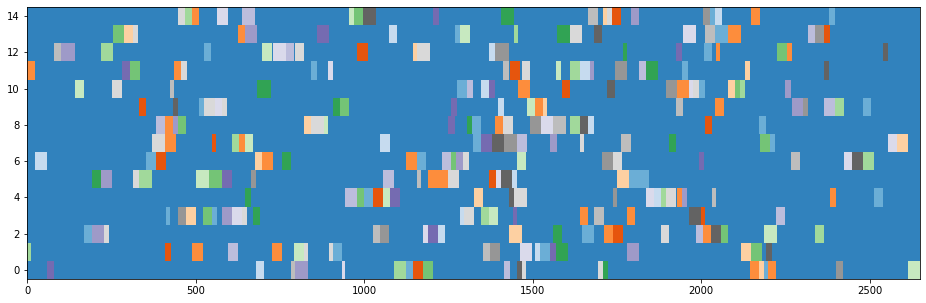

In [135]:
jssp1 = Jssp(instances[0])
jssp1.solve()
jssp1.makeSchedule()
plt.figure(figsize = (16,5))
plt.imshow(jssp1.schedule, origin='lower', aspect='auto', interpolation='nearest', cmap='tab20c')

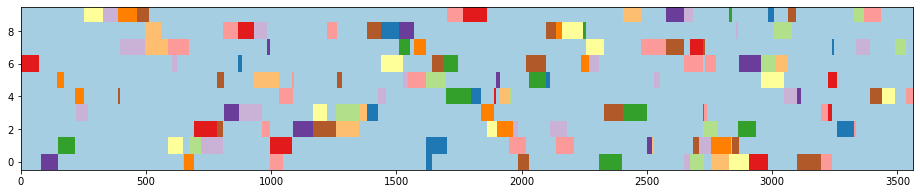

In [136]:
jssp2 = Jssp(instances[1])
jssp2.solve()
jssp2.makeSchedule()
plt.figure(figsize = (16,3))
plt.imshow(jssp2.schedule, origin='lower', aspect='auto', interpolation='nearest', cmap='Paired')

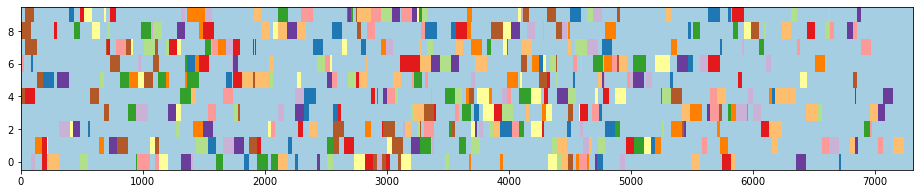

In [137]:
jssp3 = Jssp(instances[2])
jssp3.solve()
jssp3.makeSchedule()
plt.figure(figsize = (16,3))
plt.imshow(jssp3.schedule, origin='lower', aspect='auto', interpolation='nearest', cmap='Paired')

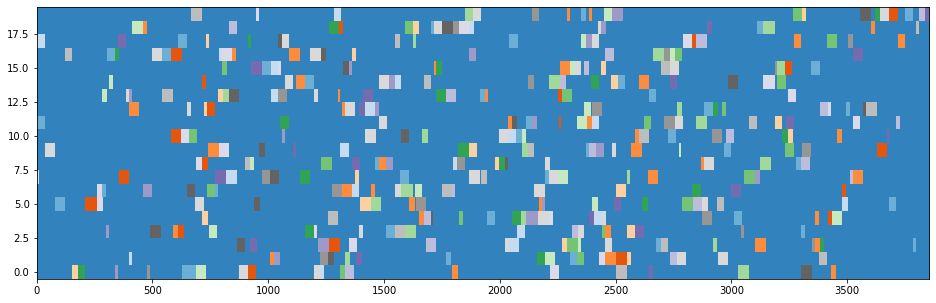

In [138]:
jssp4 = Jssp(instances[3])
jssp4.solve()
jssp4.makeSchedule()
plt.figure(figsize = (16,5))
plt.imshow(jssp4.schedule, origin='lower', aspect='auto', interpolation='nearest', cmap='tab20c')

#Random Sampling - 3 minutes

In [139]:
class JsspTimer:
  def __init__(self, instance):
    self.timefinish = time.time()+45
    self.instance = instance
    self.best = 10000
    self.finalJssp = Jssp(instance)
    self.mean = 0
    self.arr = []
    self.graph = []
  def run(self):
    while (time.time() < self.timefinish):
      jssp = Jssp(self.instance)
      jssp.solve()
      if (self.best > jssp.makespan):
        self.finalJssp = jssp
        self.best = jssp.makespan

      self.mean += jssp.makespan
      self.arr.append(jssp.makespan)
      self.graph.append(jssp.makespan)

    self.graph.sort(reverse=True)
    
  def returnMean(self):
    self.mean = self.mean/len(self.arr)
    return int(self.mean)

  def returnMed(self):
    self.arr.sort()
    if (len(self.arr) % 2):
      return int((self.arr[int(len(self.arr)/2)] + self.arr[int(len(self.arr)/2)-1])/2)
    else :
      return int(self.arr[int(len(self.arr)/2)])

  def returnSd(self):
    self.sdSum = 0
    for i in self.arr:
      self.sdSum += pow(i-self.mean, 2)
    return int(math.sqrt(self.sdSum/len(self.arr)))

In [140]:
results = []

In [144]:
for i in range(len(instances)):
  res = JsspTimer(instances[i])
  res.run()
  res.finalJssp.makeSchedule()
  results.insert(i, [res.finalJssp.schedule, 
                     res.best, 
                     res.returnMean(),
                     res.returnMed(),
                     res.returnSd(),
                     res.finalJssp.rep,
                     res.graph
                     ])


[10, 11, 10, 16, 18, 9, 18, 16, 0, 17, 12, 6, 12, 10, 9, 15, 14, 15, 19, 18, 17, 3, 15, 3, 9, 6, 0, 9, 19, 12, 4, 8, 12, 3, 6, 15, 7, 9, 16, 12, 7, 3, 13, 4, 18, 16, 16, 12, 16, 19, 18, 18, 12, 14, 9, 5, 0, 9, 4, 17, 19, 5, 19, 2, 10, 14, 10, 1, 8, 2, 10, 18, 19, 15, 9, 5, 5, 3, 8, 15, 17, 7, 6, 14, 1, 7, 15, 3, 11, 14, 17, 8, 3, 7, 0, 6, 10, 11, 2, 7, 17, 16, 11, 9, 15, 13, 7, 6, 6, 3, 6, 10, 9, 0, 10, 19, 1, 5, 19, 1, 1, 15, 18, 16, 8, 1, 0, 6, 6, 18, 19, 2, 6, 17, 3, 10, 6, 0, 2, 17, 13, 13, 0, 6, 4, 8, 5, 2, 10, 4, 2, 5, 1, 5, 15, 10, 12, 14, 14, 7, 7, 15, 3, 19, 16, 19, 19, 14, 12, 3, 13, 4, 1, 13, 17, 5, 13, 6, 7, 8, 1, 3, 4, 8, 11, 4, 2, 5, 9, 11, 13, 1, 14, 6, 4, 1, 1, 14, 1, 12, 14, 9, 1, 9, 17, 0, 7, 12, 5, 17, 7, 8, 9, 2, 11, 10, 18, 3, 8, 11, 14, 2, 4, 14, 0, 14, 0, 4, 8, 3, 4, 17, 10, 15, 16, 13, 5, 8, 18, 17, 19, 3, 13, 16, 7, 16, 9, 11, 16, 5, 15, 0, 10, 13, 15, 13, 7, 8, 8, 2, 18, 1, 12, 0, 7, 4, 17, 13, 18, 18, 16, 15, 4, 5, 11, 13, 11, 0, 16, 19, 11, 2, 4, 11, 11, 12,

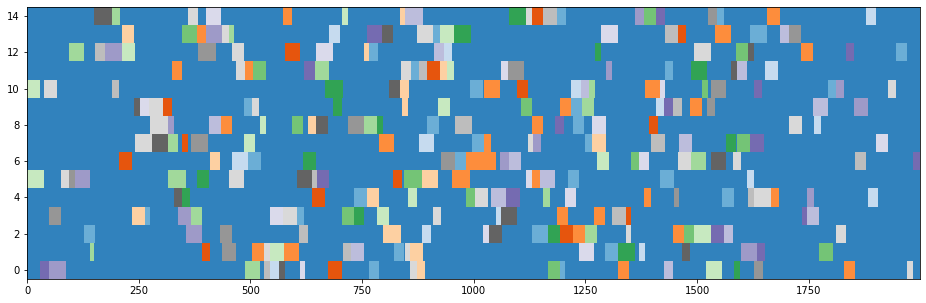

In [145]:
print(results[0][5])
plt.figure(figsize = (16,5))
plt.imshow(results[0][0], origin='lower', aspect='auto', interpolation='nearest', cmap='tab20c')

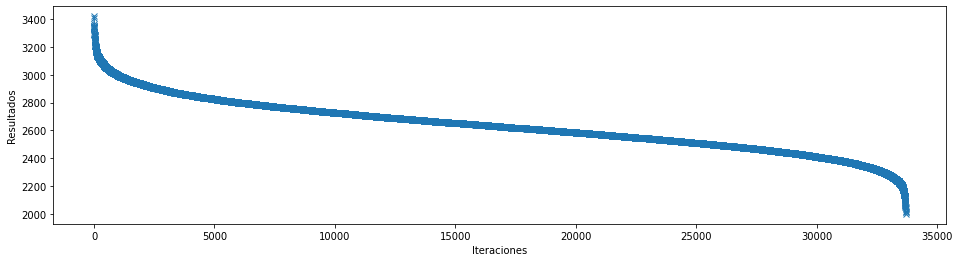

In [201]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(4)
pyplot.plot(results[0][6], '.-', marker ='x')
pyplot.xlabel('Iteraciones')
pyplot.ylabel('Resultados')
pyplot.show()

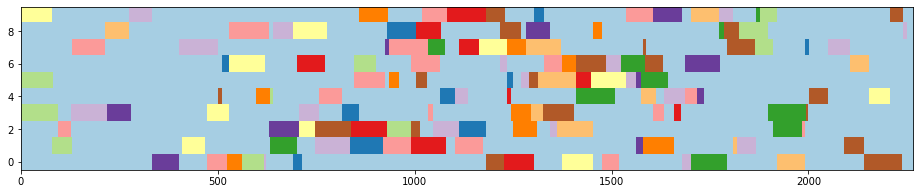

In [147]:
plt.figure(figsize = (16,3))
plt.imshow(results[1][0], origin='lower', aspect='auto', interpolation='nearest', cmap='Paired')

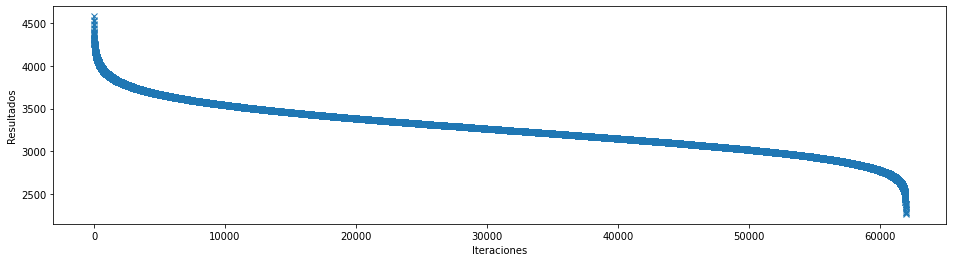

In [200]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(4)
pyplot.plot(results[1][6], '.-', marker ='x')
pyplot.xlabel('Iteraciones')
pyplot.ylabel('Resultados')
pyplot.show()

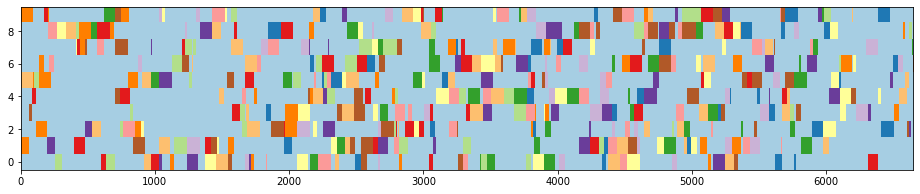

In [149]:
plt.figure(figsize = (16,3))
plt.imshow(results[2][0], origin='lower', aspect='auto', interpolation='nearest', cmap='Paired')

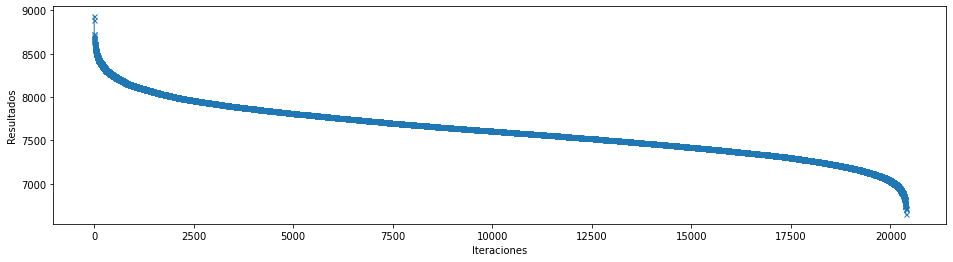

In [197]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(4)
pyplot.plot(results[2][6], '.-', linewidth=1, markersize=5, marker ='x')
pyplot.xlabel('Iteraciones')
pyplot.ylabel('Resultados')
pyplot.show()

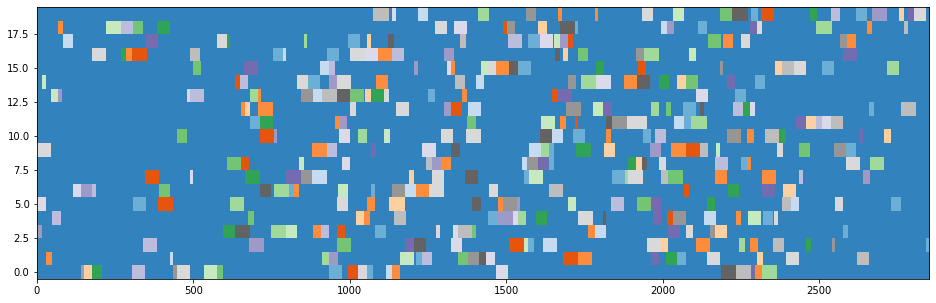

In [151]:
plt.figure(figsize = (16,5))
plt.imshow(results[3][0], origin='lower', aspect='auto', interpolation='nearest', cmap='tab20c')

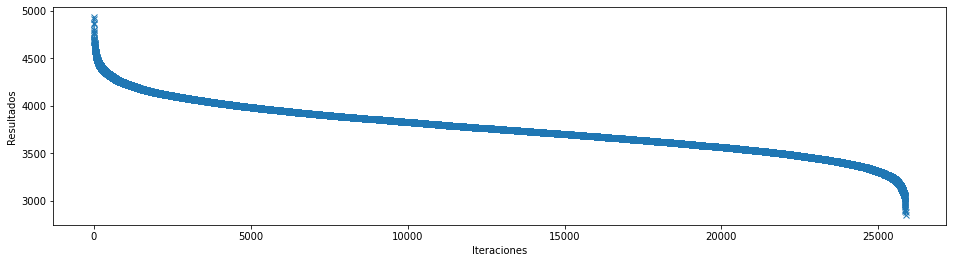

In [198]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(4)
pyplot.plot(results[3][6], '.-', marker = 'x')
pyplot.ylabel('Resultados')
pyplot.xlabel('Iteraciones')
pyplot.show()

##Results without Random Sampling

In [153]:
print("Instance\tMakespan")
print("{}\t\t{}".format(instances[0].replace(".txt", ""), jssp1.makespan))
print("{}\t\t{}".format(instances[1].replace(".txt", ""), jssp2.makespan))
print("{}\t\t{}".format(instances[2].replace(".txt", ""), jssp3.makespan))
print("{}\t\t{}".format(instances[3].replace(".txt", ""), jssp4.makespan))

Instance	Makespan
abz7		2649
la24		3564
swv15		7317
yn4		3855


##Results with Random Sampling

In [154]:
print("Instance\tBest\tMean\tMed\tsd")
print("{}\t\t{}\t{}\t{}\t{}".format(instances[0].replace(".txt", ""), results[0][1], results[0][2], results[0][3], results[0][4]))
print("{}\t\t{}\t{}\t{}\t{}".format(instances[1].replace(".txt", ""), results[1][1], results[1][2], results[1][3], results[1][4]))
print("{}\t\t{}\t{}\t{}\t{}".format(instances[2].replace(".txt", ""), results[2][1], results[2][2], results[2][3], results[2][4]))
print("{}\t\t{}\t{}\t{}\t{}".format(instances[3].replace(".txt", ""), results[3][1], results[3][2], results[3][3], results[3][4]))

Instance	Best	Mean	Med	sd
abz7		1999	2633	2629	183
la24		2267	3263	3253	279
swv15		6651	7616	7605	297
yn4		2853	3762	3754	258


#Simulated Annealing - Sin ser utilizado...

In [ ]:
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

class Simulated_Annealing:
  def objective(self, x):
    return x[0]**2.0

  def simulated_annealing(self, objective, bounds, n_iterations, step_size, temp):
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    best_eval = objective(best)
    curr, curr_eval = best, best_eval
    scores = list()

    for i in range(n_iterations):
      candidate = curr + randn(len(bounds)) * step_size
      candidate_eval = objective(candidate)
      if candidate_eval < best_eval:
        best, best_eval = candidate, candidate_eval
        scores.append(best_eval)
        print('>%d f(%s) = %.5f' % (i, best, best_eval))
      diff = candidate_eval - curr_eval
      t = temp / float(i + 1)
      metropolis = exp(-diff / t)
      if diff < 0 or rand() < metropolis:
        curr, curr_eval = candidate, candidate_eval
    return [best, best_eval, scores]

seed(1)
bounds = asarray([[1500.0, 3500.0]])
n_iterations = 1000
step_size = 2
temp = 10
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)

#Genetic algorithm

In [162]:
from os import kill
class Genetic:

  def __init__(self,num_data,num_fitnes,file):
    self.filename=file
    self.num_data=num_data
    self.num_fitnes=num_fitnes

    self.jssp = Jssp(file)

    with open(self.filename) as f:
      self.n, self.m = [int(x) for x in f.readline().split()]
    self.arr=self.generateMatrixAleatorio(self.num_data,self.n,self.m) #llenar el arr con el perr

  def generateMatrixAleatorio(self,size_array,n,m):
    arr=[]
    for k in range(size_array):
      rep = []
      for i in range(n):
        rep.extend(np.full(m,i))
      np.random.shuffle(rep)
      arr.append(rep)
    return arr

  def generateArrayAll(self,n,m):
    rep = []
    for i in range(n):
      rep.extend(np.full(m,i))
      np.random.shuffle(rep)
    return rep

  def run(self):
    self.timefinish = time.time()+45
    
    while (time.time() < self.timefinish):
      weight=[]
      weightxxx=[]
      for j in range(self.num_data):
        self.jssp = Jssp(self.filename)
        self.jssp.solve()
        aux = self.jssp.makespan
        weight.append(aux)
        weightxxx.append(aux)
      
      auxweight=weight
      indexweight=[]
      for j in range(self.num_fitnes):
        indexweight.append(auxweight.index(min(auxweight)))
        auxweight.insert(auxweight.index(min(auxweight)),2000)
        auxweight.remove(min(auxweight))

      auxsum=0
      for j in range(len(indexweight)):
        auxsum+=weightxxx[indexweight[j]]

      arrNew=[]
      counter=0
      for k in range(self.num_data-1):
        auxarr1=[]
        perr=self.generateArrayAll(self.n,self.m)
        size=random.randint(1,(self.n*self.m)-1)
        for j in range(size):
          auxarr1.append(self.arr[indexweight[counter]][j])
        for j in range(size):
          perr.remove(auxarr1[j])
        arrNew.append(auxarr1+perr)
        counter+=1
        if(counter==6):
          counter=0
      arrNew.append(self.arr[indexweight[0]])
      self.arr=arrNew

  def returnJssp(self):
    return self.jssp

In [163]:
genetic1 = Genetic(600,100,instances[0])

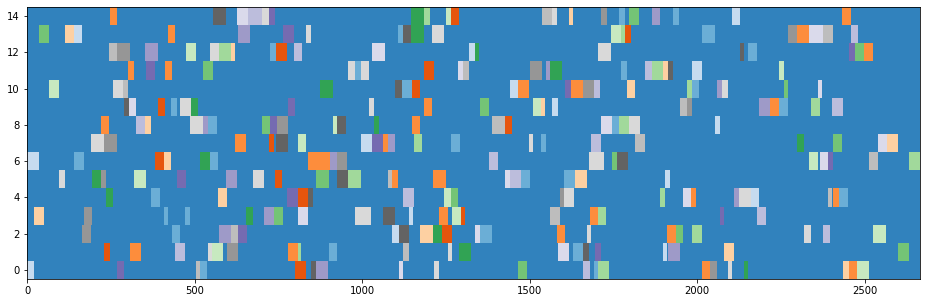

In [167]:
genetic1.run()
genetic1.jssp.makeSchedule()
plt.figure(figsize = (16,5))
plt.imshow(genetic1.jssp.schedule, origin='lower', aspect='auto', interpolation='nearest', cmap='tab20c')

In [168]:
genetic2 = Genetic(600,100,instances[1])

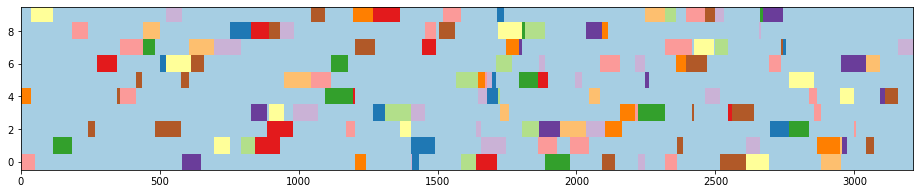

In [170]:
genetic2.run()
genetic2.jssp.makeSchedule()
plt.figure(figsize = (16,3))
plt.imshow(genetic2.jssp.schedule, origin='lower', aspect='auto', interpolation='nearest', cmap='Paired')

In [169]:
genetic3 = Genetic(600,100,instances[2])

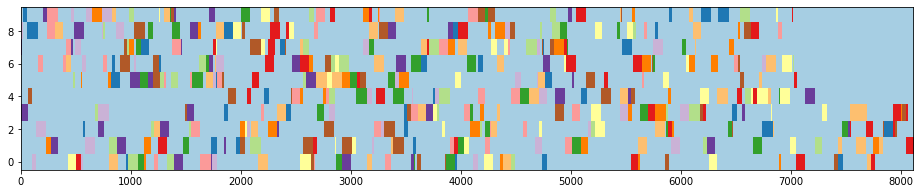

In [171]:
genetic3.run()
genetic3.jssp.makeSchedule()
plt.figure(figsize = (16,3))
plt.imshow(genetic3.jssp.schedule, origin='lower', aspect='auto', interpolation='nearest', cmap='Paired')

In [172]:
genetic4 = Genetic(600,100,instances[3])

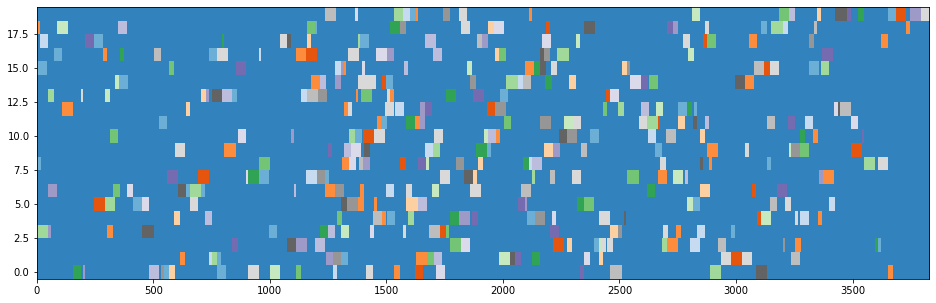

In [173]:
genetic4.run()
genetic4.jssp.makeSchedule()
plt.figure(figsize = (16,5))
plt.imshow(genetic4.jssp.schedule, origin='lower', aspect='auto', interpolation='nearest', cmap='tab20c')

One Random

In [174]:
print("Instance\tMakespan")
print("{}\t\t{}".format(instances[0].replace(".txt", ""), jssp1.makespan))
print("{}\t\t{}".format(instances[1].replace(".txt", ""), jssp2.makespan))
print("{}\t\t{}".format(instances[2].replace(".txt", ""), jssp3.makespan))
print("{}\t\t{}".format(instances[3].replace(".txt", ""), jssp4.makespan))

Instance	Makespan
abz7		2649
la24		3564
swv15		7317
yn4		3855


Random Sampling

In [175]:
print("Instance\tBest\tMean\tMed\tsd")
print("{}\t\t{}\t{}\t{}\t{}".format(instances[0].replace(".txt", ""), results[0][1], results[0][2], results[0][3], results[0][4]))
print("{}\t\t{}\t{}\t{}\t{}".format(instances[1].replace(".txt", ""), results[1][1], results[1][2], results[1][3], results[1][4]))
print("{}\t\t{}\t{}\t{}\t{}".format(instances[2].replace(".txt", ""), results[2][1], results[2][2], results[2][3], results[2][4]))
print("{}\t\t{}\t{}\t{}\t{}".format(instances[3].replace(".txt", ""), results[3][1], results[3][2], results[3][3], results[3][4]))

Instance	Best	Mean	Med	sd
abz7		1999	2633	2629	183
la24		2267	3263	3253	279
swv15		6651	7616	7605	297
yn4		2853	3762	3754	258


Genetic

In [176]:
print("Instance\tMakespan")
print("{}\t\t{}".format(instances[0].replace(".txt", ""), genetic1.jssp.makespan))
print("{}\t\t{}".format(instances[1].replace(".txt", ""), genetic2.jssp.makespan))
print("{}\t\t{}".format(instances[2].replace(".txt", ""), genetic3.jssp.makespan))
print("{}\t\t{}".format(instances[3].replace(".txt", ""), genetic4.jssp.makespan))

Instance	Makespan
abz7		2665
la24		3213
swv15		8113
yn4		3830


#Conclusion

####En conclusión, a pesar de no haber podido resolver el algoritmo genetico para que considere el valor "rep" de cada JSSP como un genoma (y por eso los valores obtenidos en el "algoritmo genetico"), se puede llegar a la conclusión que siendo un algoritmo de optimización, si realmente funcionara, encontraría mejores resultados que el Random Sampling. Sin embargo, para mis soluciones, lo más rapido y efectivo ha sido el Random Sampling, sin embargo, repito, el Algoritmo Genetico, según sus características, sería la mejor solución para el problema, si tan solo lograra combinar para que funcione el "rep" y el genoma, dejando claro que debe tener la misma cantidad de trabajos y maquinas como la instancia, lo más probable es que esta sea la solución optima al problema.
